In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 불러오기 및 전처리

In [3]:
weekday_data = pd.read_csv('data/processed/train_주중data2.csv')
friday_data = pd.read_csv('data/processed/train_금요일data2.csv')
weekend_data = pd.read_csv('data/processed/train_주말data2.csv')

# 데이터셋 확인
print("Weekday Data: ", weekday_data.head())
print("Friday Data: ", friday_data.head())
print("Weekend Data: ", weekend_data.head())

/var/folders/tg/ntvm9wc94h937xqtzftck9xc0000gn/T/ipykernel_21322/2652658401.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  weekday_data = pd.read_csv('data/processed/train_주중data2.csv')
/var/folders/tg/ntvm9wc94h937xqtzftck9xc0000gn/T/ipykernel_21322/2652658401.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  friday_data = pd.read_csv('data/processed/train_금요일data2.csv')


Weekday Data:       차량이름                 승차시간    승차요일       승차X좌표      승차Y좌표  \
0  clspqc  2023-04-03 00:00:16  Monday  127.392879  36.338629   
1  clspqc  2023-04-03 00:06:15  Monday  127.375892  36.348033   
2  cytplg  2023-04-03 00:01:19  Monday  127.350632  36.361790   
3  gxpwil  2023-04-03 00:00:27  Monday  127.377370  36.351706   
4  clspqc  2023-04-03 00:14:09  Monday  127.382204  36.334894   

                  하차시간       하차X좌표      하차Y좌표  승차거리(m) 할증여부  ...  \
0  2023-04-03 00:04:20  127.373209  36.347611   2372.0    1  ...   
1  2023-04-03 00:08:45  127.378054  36.336707   1449.0    1  ...   
2  2023-04-03 00:13:18  127.390382  36.348084   5642.0    1  ...   
3  2023-04-03 00:13:45  127.359768  36.374444   4728.0    1  ...   
4  2023-04-03 00:19:20  127.397827  36.332249   2222.0    1  ...   

              주행시간 주행시간_초  hour  year  month  day  기온(°C)  강수량(mm)     group  \
0  0 days 00:04:04  244.0     0  2023      4    3    14.8      0.0  Weekdays   
1  0 days 00:02:30  150.0

/var/folders/tg/ntvm9wc94h937xqtzftck9xc0000gn/T/ipykernel_21322/2652658401.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  weekend_data = pd.read_csv('data/processed/train_주말data2.csv')


In [4]:
weekday_data['승차시간'] = pd.to_datetime(weekday_data['승차시간'])
friday_data['승차시간'] = pd.to_datetime(friday_data['승차시간'])
weekend_data['승차시간'] = pd.to_datetime(weekend_data['승차시간'])

In [5]:
# 할증여부 열을 float로 변환
weekday_data['할증여부'] = pd.to_numeric(weekday_data['할증여부'], errors='coerce')
friday_data['할증여부'] = pd.to_numeric(friday_data['할증여부'], errors='coerce')
weekend_data['할증여부'] = pd.to_numeric(weekend_data['할증여부'], errors='coerce')

In [6]:
weekday_data.dropna(inplace=True)
friday_data.dropna(inplace=True)
weekend_data.dropna(inplace=True)

#### - 위도, 경도 소수점 넷쩨자리까지 반올림

In [7]:
weekday_data['승차X좌표'] = weekday_data['승차X좌표'].round(4)
weekday_data['승차Y좌표'] = weekday_data['승차Y좌표'].round(4)

friday_data['승차X좌표'] = friday_data['승차X좌표'].round(4)
friday_data['승차Y좌표'] = friday_data['승차Y좌표'].round(4)

weekend_data['승차X좌표'] = weekend_data['승차X좌표'].round(4)
weekend_data['승차Y좌표'] = weekend_data['승차Y좌표'].round(4)

In [8]:
weekend_data.head()

,차량이름,승차시간,승차요일,승차X좌표,승차Y좌표,하차시간,하차X좌표,하차Y좌표,승차거리(m),할증여부,...,주행시간,주행시간_초,hour,year,month,day,기온(°C),강수량(mm),group,holiday
0,bfllzp,2023-04-01 00:04:45,Saturday,127.3367,36.3078,2023-04-01 00:11:28,127.345800,36.323435,2531.0,1.0,...,0 days 00:06:43,403.0,0,2023,4,1,12.1,0.0,Weekend,0
1,clspqc,2023-04-01 00:06:20,Saturday,127.4119,36.3367,2023-04-01 00:12:18,127.420696,36.346687,2086.0,1.0,...,0 days 00:05:58,358.0,0,2023,4,1,12.1,0.0,Weekend,0
2,dmpnpp,2023-04-01 00:05:10,Saturday,127.4343,36.3282,2023-04-01 00:13:34,127.461915,36.330595,3682.0,1.0,...,0 days 00:08:24,504.0,0,2023,4,1,12.1,0.0,Weekend,0
3,hzdykr,2023-04-01 00:10:31,Saturday,127.3396,36.3484,2023-04-01 00:15:13,127.353202,36.361700,2594.0,1.0,...,0 days 00:04:42,282.0,0,2023,4,1,12.1,0.0,Weekend,0
4,eiihxy,2023-04-01 00:04:28,Saturday,127.3892,36.3496,2023-04-01 00:18:24,127.345296,36.341787,5259.0,1.0,...,0 days 00:13:56,836.0,0,2023,4,1,12.1,0.0,Weekend,0


# 2. 클러스터링 과정

### 1. K 값 설정하기 (엘보우)
### 1) 금요일 데이터

friday data - Elbow Method:


/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

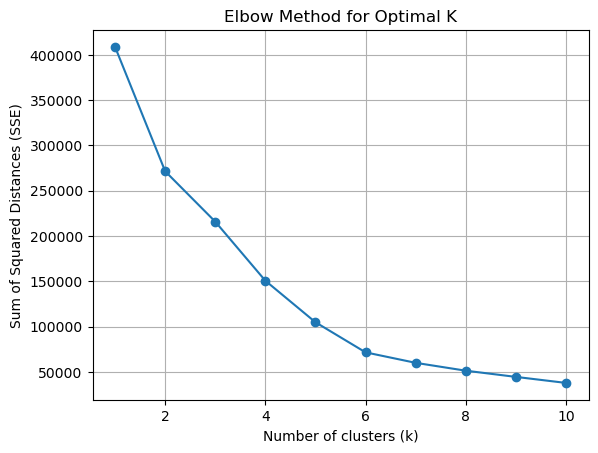

In [9]:
#금요일데이터
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 엘보우 방법을 통해 최적의 k 값을 구하는 함수
def elbow_method(data, feature_columns):
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(data[feature_columns])

    sse = []
    k_range = range(1, 11)  # 클러스터 개수 1~10까지 확인
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_features)
        sse.append(kmeans.inertia_)

    # Elbow plot 시각화
    plt.plot(k_range, sse, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Sum of Squared Distances (SSE)')
    plt.grid(True)
    plt.show()

# 각 데이터셋에 대해 엘보우 방법 적용
features = ['승차X좌표', '승차Y좌표', 'hour', '기온(°C)', '강수량(mm)','holiday']

print("friday data - Elbow Method:")
elbow_method(friday_data, features)

In [ ]:
#k=3

### 2) 주중데이터

/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

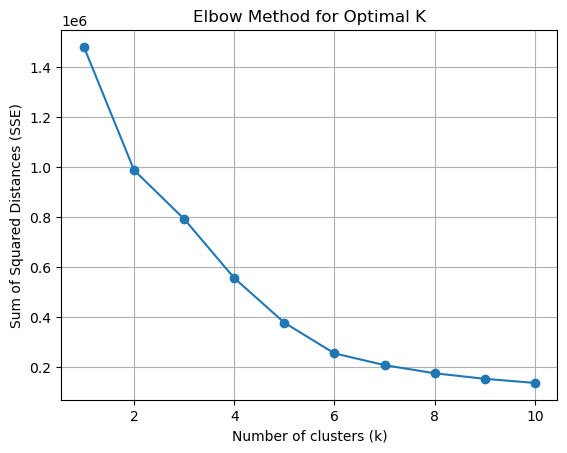

In [10]:
elbow_method(weekday_data, features)


In [11]:
#  k =4

### 3) 주말 데이터

/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

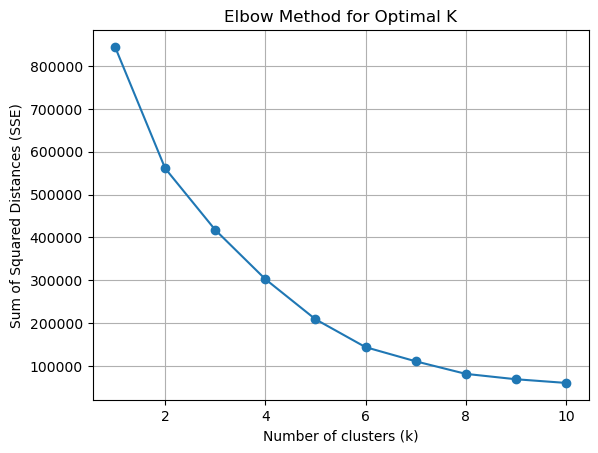

In [12]:
elbow_method(weekend_data, features)


In [13]:
# k =3

### 2. K 값 설정하기 (실루엣 점수 )
### 1) 금요일 데이터

/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

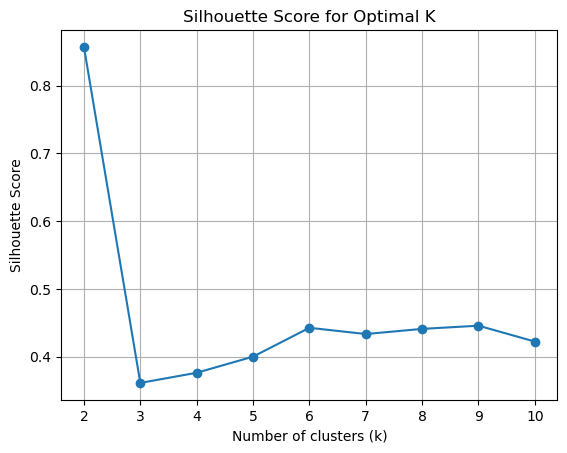

최적의 클러스터 개수: 2


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 실루엣 점수를 통해 최적의 k 값을 구하는 함수
def silhouette_method(data, feature_columns, max_k=10):
    # 데이터 스케일링
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(data[feature_columns])

    silhouette_scores = []
    k_range = range(2, max_k + 1)  # 클러스터 개수 2~max_k까지 확인

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_features)
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(scaled_features, labels)
        silhouette_scores.append(silhouette_avg)

    # 실루엣 점수 시각화
    plt.plot(k_range, silhouette_scores, marker='o')
    plt.title('Silhouette Score for Optimal K')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()

    # 최적의 클러스터 개수 출력
    best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
    print(f"최적의 클러스터 개수: {best_k}")

# 예시 데이터 (실제로는 'weekday_data'와 같은 실제 데이터를 사용)
# weekday_data는 미리 준비된 데이터프레임이라고 가정
features = ['승차X좌표', '승차Y좌표', 'hour', '기온(°C)', '강수량(mm)','holiday']

# 실루엣 계수를 기반으로 최적의 클러스터 개수 찾기
silhouette_method(friday_data, features)

### 금요일 클러스터 개수 찾기 _ 엘보우 + 실루엣 해석
1. 엘보우 방법의 결과 해석:
- 엘보우 방법에서는 k=3 또는 k=4에서 SSE의 감소가 완만해지는 구간을 볼 수 있었습니다. 이로 미루어 볼 때, 이 지점에서 클러스터 개수를 선택하는 것이 합리적입니다.
- 따라서 엘보우 방법만을 고려한다면 k=3 또는 k=4가 적합합니다.
2. 실루엣 점수 해석:
- 실루엣 점수는 클러스터링의 품질을 나타내는 지표로, 점수가 높을수록 클러스터 내부의 응집력이 높고, 클러스터 간의 분리가 잘 이루어진다는 것을 의미합니다.
- 실루엣 점수가 가장 높은 지점이 최적의 클러스터 개수로 해석됩니다.
- 그래프에서 보면 k=2에서 가장 높은 실루엣 점수(약 0.8)를 얻고 있습니다. 하지만 실루엣 점수는 k=3 또는 k=4에서도 어느 정도 유지되고 있습니다.
3. 결론:
- k=2는 실루엣 점수 측면에서 최적의 클러스터 개수로 보이지만, 2개의 클러스터는 데이터의 패턴을 지나치게 단순화할 가능성이 있습니다.
- k=3 또는 k=4는 엘보우 방법에서 추천된 값이며, 실루엣 점수도 0.6~0.7로 여전히 준수한 수준을 유지하고 있습니다.
- 따라서 k=3을 선택하는 것이 균형적인 선택일 수 있습니다. 이 값은 엘보우 방법에서도 추천되었고, 실루엣 점수도 여전히 준수한 수준을 유지하므로 클러스터링의 품질과 데이터의 복잡성을 적절히 반영할 수 있습니다.

### 2. 클러스터링 진행하기 (k=3으로 진행)

In [15]:
#클러스터링 코드
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 다변량 클러스터링 및 시각화를 위한 함수
def perform_clustering_and_visualize(data, n_clusters=5, filter_outliers=True):
    # 사용할 특성 선택
    features = ['승차X좌표', '승차Y좌표', 'hour', '기온(°C)', '강수량(mm)','holiday']

    # 결측값이 있는 행 제거
    data_clean = data.dropna(subset=features)

    # 이상값 제거 (X, Y 좌표가 0보다 큰 값만 사용)
    if filter_outliers:
        data_filtered = data_clean[(data_clean['승차X좌표'] > 0) & (data_clean['승차Y좌표'] > 0)]
    else:
        data_filtered = data_clean

    # 클러스터링에 사용할 피처 선택
    features_filtered = data_filtered[features]

    # 표준화를 적용하여 각 특성의 범위를 맞춤
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features_filtered)

    # KMeans 클러스터링 수행
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(scaled_features)

    # 클러스터 레이블을 데이터에 추가
    data_filtered['cluster_multi'] = kmeans.labels_

    # 클러스터링 결과 시각화
    plt.figure(figsize=(10, 6))
    plt.scatter(data_filtered['승차X좌표'], data_filtered['승차Y좌표'], c=data_filtered['cluster_multi'], cmap='viridis', marker='o')
    plt.title('Clustering Visualization After Removing Outliers')
    plt.xlabel('승차X좌표')
    plt.ylabel('승차Y좌표')
    plt.colorbar(label='Cluster')
    plt.show()

    return data_filtered

/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/tg/ntvm9wc94h937xqtzftck9xc0000gn/T/ipykernel_21322/234689618.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['cluster_multi'] = kmeans.labels_
/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/IPython/core/pylabto

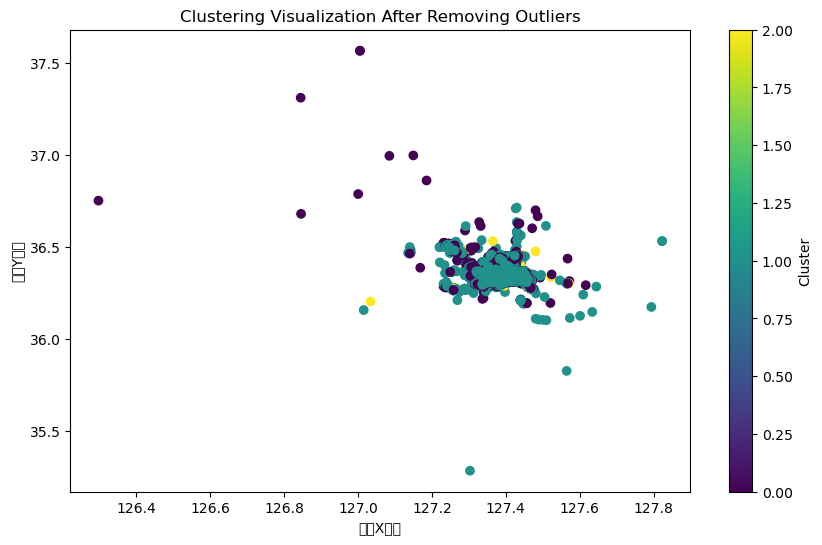

/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/tg/ntvm9wc94h937xqtzftck9xc0000gn/T/ipykernel_21322/234689618.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['cluster_multi'] = kmeans.labels_
/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/IPython/core/pylabto

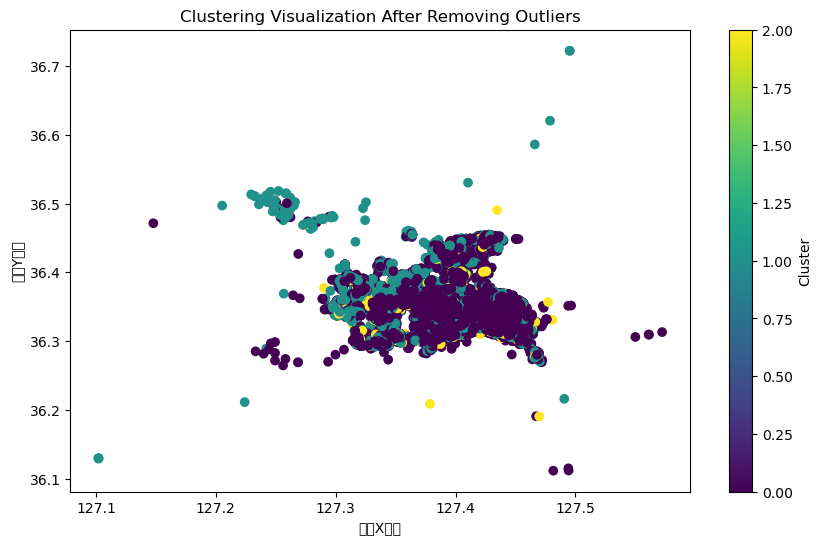

/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/tg/ntvm9wc94h937xqtzftck9xc0000gn/T/ipykernel_21322/234689618.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['cluster_multi'] = kmeans.labels_
/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/nayeong-eun/anaconda3/lib/python3.11/site-packages/IPython/core/pylabto

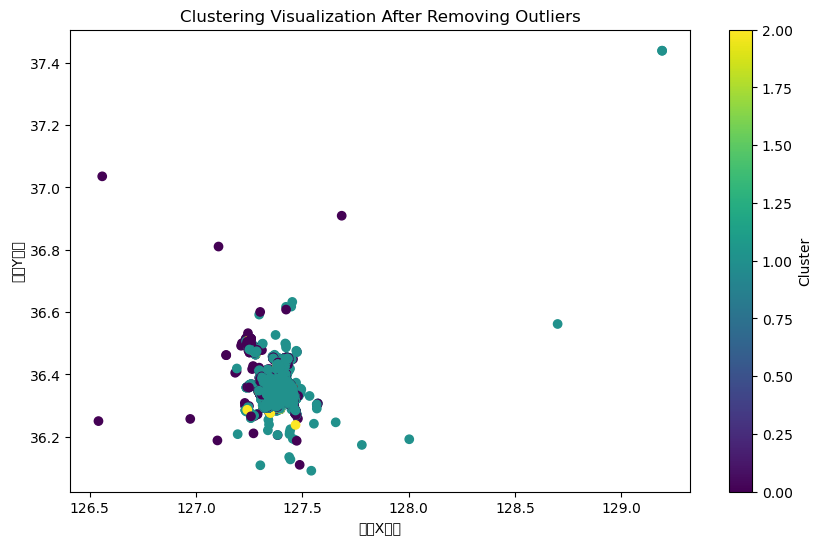

In [16]:
# 주중 데이터에 대해 클러스터링 및 시각화
weekday_clustered = perform_clustering_and_visualize(weekday_data, n_clusters=3)

# 금요일 데이터에 대해 클러스터링 및 시각화
friday_clustered = perform_clustering_and_visualize(friday_data, n_clusters=3)

# 주말 데이터에 대해 클러스터링 및 시각화
weekend_clustered = perform_clustering_and_visualize(weekend_data, n_clusters=3)

### 3. 클러스터 별 특징 파악하기

In [21]:
#주중 특징
cluster_features1 = weekday_clustered.groupby('cluster_multi').agg({
    '승차X좌표': ['mean', 'std'],
    '승차Y좌표': ['mean', 'std'],
    'hour': ['mean', 'std'],
    '기온(°C)': ['mean', 'std'],
    '강수량(mm)': ['mean', 'std'],
    'holiday': 'mean'  # 각 클러스터에서 공휴일의 비율 계산
}).reset_index()
cluster_features1

cluster_multi       승차X좌표                승차Y좌표                 hour  \
                       mean       std       mean       std       mean   
0             0  127.388469  0.037337  36.350260  0.030625   5.832985   
1             1  127.393513  0.037316  36.346031  0.027949  18.013446   
2             2  127.393432  0.037625  36.346162  0.027726  12.942510   

                기온(°C)              강수량(mm)           holiday  
        std       mean        std      mean       std    mean  
0  4.273152  10.619039   9.687180  0.159094  1.172381     0.0  
1  3.653437  17.073030   9.943828  0.388855  2.176843     0.0  
2  7.673655  13.814939  10.123347  0.000000  0.000000     1.0

[주중]
- 클러스터 0: 주로 아침 시간대에, 비가 거의 내리지 않고 기온이 낮은 환경에서 비공휴일에 발생한 승차.
- 클러스터 1: 주로 저녁 시간대에, 기온이 보통 정도이고 비가 내리는 비공휴일에 발생한 승차.
- 클러스터 2: 정오 즈음에, 비가 내리지 않는 공휴일에 발생한 승차.

In [22]:
#금요일 특징
cluster_features2 = friday_clustered.groupby('cluster_multi').agg({
    '승차X좌표': ['mean', 'std'],
    '승차Y좌표': ['mean', 'std'],
    'hour': ['mean', 'std'],
    '기온(°C)': ['mean', 'std'],
    '강수량(mm)': ['mean', 'std'],
    'holiday': 'mean'
}).reset_index()
cluster_features2

cluster_multi       승차X좌표                승차Y좌표                 hour  \
                       mean       std       mean       std       mean   
0             0  127.395351  0.037024  36.344414  0.026460  18.212280   
1             1  127.386026  0.036814  36.352481  0.030464   5.498846   
2             2  127.393055  0.037250  36.344336  0.025071  12.665478   

                기온(°C)              강수량(mm)           holiday  
        std       mean        std      mean       std    mean  
0  3.593482  16.530340  10.086332  0.359801  2.107659     0.0  
1  4.232761  11.705104   9.546715  0.258058  1.599133     0.0  
2  7.705710   6.690894   9.540458  1.357846  2.664730     1.0

[금요일]
- 클러스터 0: 주로 저녁 시간대에, 기온이 낮고 비가 내리는 환경에서 비공휴일에 발생한 승차.
- 클러스터 1: 주로 새벽 시간대에, 기온이 낮고 비가 약간 내리는 비공휴일에 발생한 승차.
- 클러스터 2: 정오 즈음에, 기온이 낮고 비가 내리지 않는 공휴일에 발생한 승차.

In [23]:
#주말 특징
cluster_features3 = weekend_clustered.groupby('cluster_multi').agg({
    '승차X좌표': ['mean', 'std'],
    '승차Y좌표': ['mean', 'std'],
    'hour': ['mean', 'std'],
    '기온(°C)': ['mean', 'std'],
    '강수량(mm)': ['mean', 'std'],
    'holiday': 'mean'
}).reset_index()
cluster_features3

cluster_multi       승차X좌표                승차Y좌표                 hour  \
                       mean       std       mean       std       mean   
0             0  127.388042  0.037275  36.347683  0.027749   4.470991   
1             1  127.395441  0.038602  36.344814  0.026992  17.753244   
2             2  127.396324  0.037206  36.344470  0.026330  13.307087   

                기온(°C)              강수량(mm)           holiday  
        std       mean        std      mean       std    mean  
0  3.921329  10.115986   9.508570  0.054107  0.419740     0.0  
1  3.845039  16.825508  10.060002  0.191918  1.295509     0.0  
2  7.657154   1.479318   2.991980  0.000000  0.000000     1.0

In [24]:
#클러스터링 데이터 저장
weekday_clustered.to_csv('data/processed/weekday_clusted.csv', index = False)
friday_clustered.to_csv('data/processed/friday_clusted.csv', index = False)
weekend_clustered.to_csv('data/processed/weekend_clusted.csv', index = False)

In [25]:
# 주어진 데이터를 각각 불러옵니다.
weekday_clustered = pd.read_csv('data/processed/weekday_clusted.csv')
friday_clustered = pd.read_csv('data/processed/friday_clusted.csv')
weekend_clustered = pd.read_csv('data/processed/weekend_clusted.csv')